# Transformacija podataka

### Importovanje potrebnih biblioteka

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from category_encoders import CountEncoder, TargetEncoder
from scipy import stats

warnings.filterwarnings('ignore')

sns.set_theme(context='notebook', style='whitegrid', palette='dark:#5A9_r', font_scale=1.2)

### Učitavanje podataka

In [2]:
# Učitavanje i pregled podataka
file_path = "Product Sales Data.xlsx"
data = pd.read_excel(file_path)

# Prikaz dimenzija podataka
print(f"Podaci sadrže {data.shape[0]} redova i {data.shape[1]} kolona.")

Podaci sadrže 700 redova i 16 kolona.


### Pregled i analiza podataka

In [3]:
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Germany,Carretera,NaN,1513.0,3,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
1,Government,Germany,Paseo,NaN,1006.0,10,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014
2,Government,Canada,Paseo,NaN,1725.0,10,350,603750.0,0.0,603750.0,448500.0,155250.0,2013-11-01,11,November,2013
3,Government,Germany,Paseo,NaN,1513.0,10,350,529550.0,0.0,529550.0,393380.0,136170.0,2014-12-01,12,December,2014
4,Government,Germany,Velo,NaN,1006.0,120,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [5]:
# Provera nedostajućih vrednosti
print("Nedostajuće vrednosti po kolonama:")
print(data.isnull().sum())

Nedostajuće vrednosti po kolonama:
Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts               0
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64


In [6]:
# Pregled jedinstvenih vrednosti u koloni 'Discount Band'
print("Jedinstvene vrednosti u koloni 'Discount Band':")
print(data['Discount Band'].unique())

Jedinstvene vrednosti u koloni 'Discount Band':
[nan 'Low' 'Medium' 'High']


In [7]:
# Popunjavanje nedostajućih vrednosti u koloni 'Discount Band'
data['Discount Band'].fillna('No Discount', inplace=True)

In [8]:
# Provera dupliranih redova
duplicates = data.duplicated().sum()
print(f"Broj dupliranih redova: {duplicates}")

Broj dupliranih redova: 0


In [9]:
data.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322


In [10]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()
categorical_columns.remove('Month Name')
print(categorical_columns)

numerical_columns = data.select_dtypes(exclude=['object', 'datetime']).columns.tolist()
print(numerical_columns)


['Segment', 'Country', 'Product', 'Discount Band']
['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit', 'Month Number', 'Year']


### Vizuelizacija podataka

#### Vizuelizacija numeričkih atributa

Numeričke kolone: ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit', 'Month Number', 'Year']


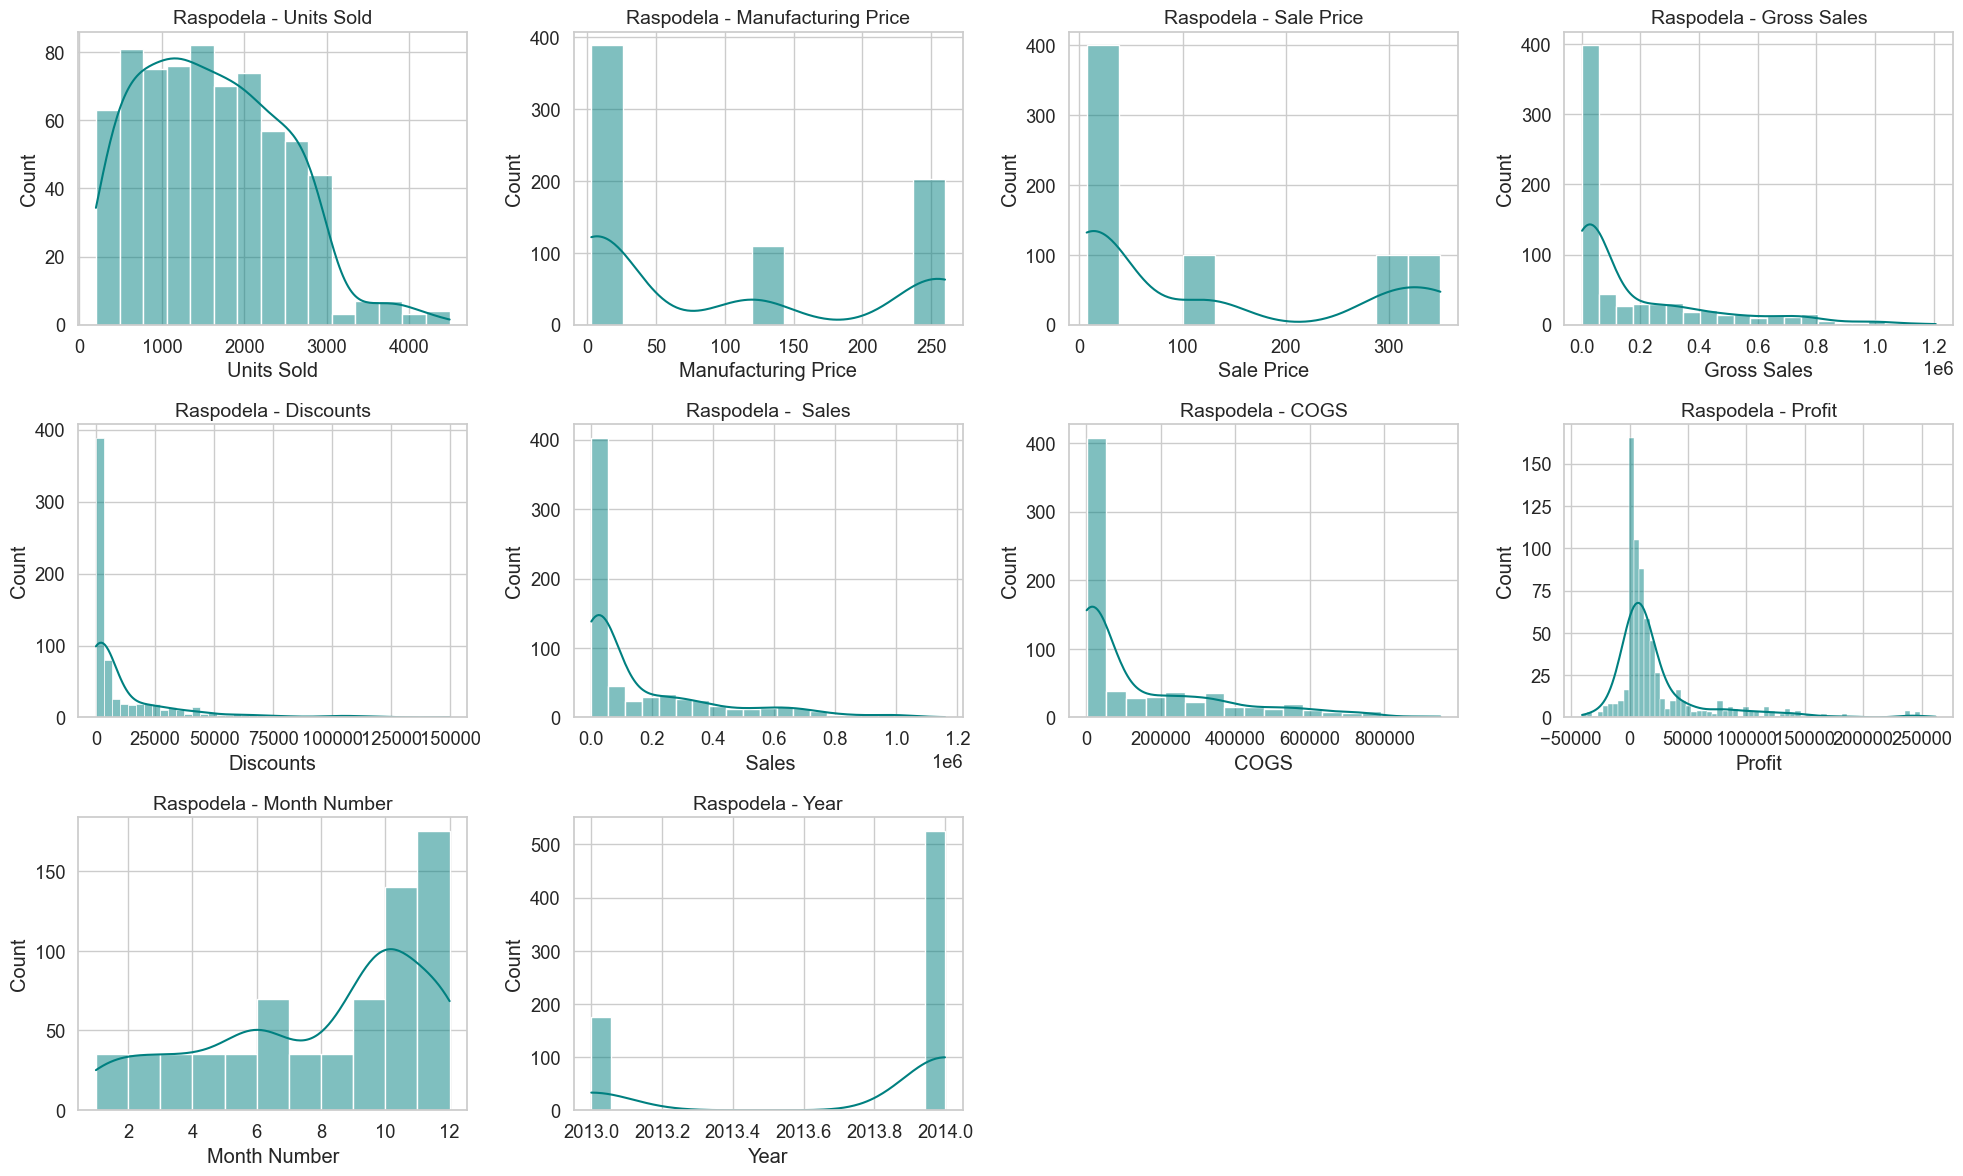

In [ ]:
def visualize_numerical_features(data):
    n = len(numerical_columns)
    cols = 4
    rows = math.ceil(n / cols)

    print(f"Numeričke kolone: {numerical_columns}")
    plt.figure(figsize=(cols * 5, rows * 4))

    if n == 1:
        sns.histplot(data[numerical_columns[0]], kde=True, color='teal')
        plt.title(f'Raspodela - {numerical_columns[0]}', fontsize=14)
    else:
        for i, column in enumerate(numerical_columns, 1):
            plt.subplot(rows, cols, i)
            sns.histplot(data[column], kde=True, color='teal')
            plt.title(f'Raspodela - {column}', fontsize=14)

    plt.tight_layout()
    plt.show()

visualize_numerical_features(data)

#### Vizuelizacija kategorickih atributa

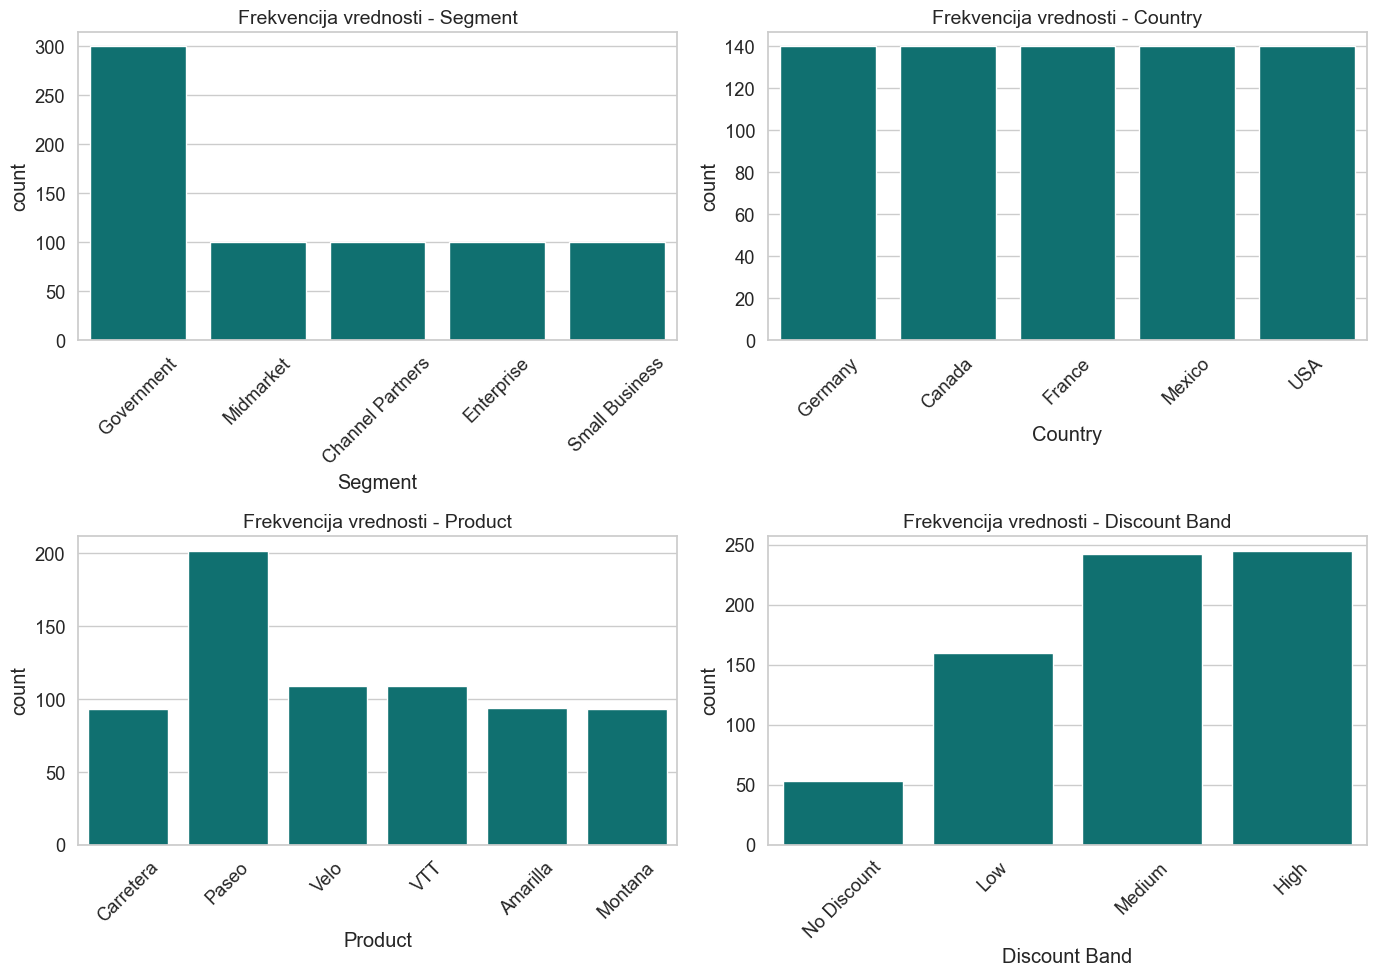

In [12]:
def visualize_categorical_features(data):
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(x=column, data=data, color='teal')  
        plt.title(f'Frekvencija vrednosti - {column}', fontsize=14)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_categorical_features(data)

### Definisanje algoritma za klasifikaciju

In [13]:
def svm(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42, class_weight='balanced')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(classification_report(y_test, y_pred))


In [14]:
def apply_svm(data):
    numerical_columns = data.select_dtypes(exclude='object').columns.tolist()
    X = data[numerical_columns]
    X = X.drop(columns=['Date'])
    y = data['Discount Band']

    svm(X, y)

In [15]:
apply_svm(data)


              precision    recall  f1-score   support

        High       0.86      0.11      0.20        53
         Low       0.28      0.24      0.25        34
      Medium       0.38      0.12      0.18        43
 No Discount       0.09      0.80      0.16        10

    accuracy                           0.19       140
   macro avg       0.40      0.32      0.20       140
weighted avg       0.52      0.19      0.20       140



### Enkodiranje kategoričkih atributa

In [16]:
for col in categorical_columns:
    unique_vals = data[col].unique()
    print(f"Kolona: {col}")
    print(f"Broj jedinstvenih vrednosti: {len(unique_vals)}")
    print(f"Jedinstvene vrednosti: {unique_vals}")
    print()


Kolona: Segment
Broj jedinstvenih vrednosti: 5
Jedinstvene vrednosti: ['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']

Kolona: Country
Broj jedinstvenih vrednosti: 5
Jedinstvene vrednosti: ['Germany' 'Canada' 'France' 'Mexico' 'USA']

Kolona: Product
Broj jedinstvenih vrednosti: 6
Jedinstvene vrednosti: ['Carretera' 'Paseo' 'Velo' 'VTT' 'Amarilla' 'Montana']

Kolona: Discount Band
Broj jedinstvenih vrednosti: 4
Jedinstvene vrednosti: ['No Discount' 'Low' 'Medium' 'High']



In [17]:
def encode_data(data):
    data_copy = data.copy()
    target_encoder = TargetEncoder(cols=['Segment'])
    data_copy['Segment_Target'] = target_encoder.fit_transform(data[['Segment']], data[' Sales'])

    data_country_one_hot = pd.get_dummies(data[['Country']], prefix='Country')

    count_encoder = CountEncoder(cols=['Product'])
    data_product_count = count_encoder.fit_transform(data[['Product']])
    data_product_count.rename(columns={'Product': 'Product_Count'}, inplace=True)

    discount_order = ['No Discount', 'Low', 'Medium', 'High']
    ordinal_encoder = OrdinalEncoder(categories=[discount_order])
    data_copy['Discount Band'] = ordinal_encoder.fit_transform(data[['Discount Band']])

    data_copy = data_copy.drop(columns=['Segment','Product', 'Country'])
    data_encoded = pd.concat([data_copy, data_country_one_hot, data_product_count], axis=1)

    return data_encoded


In [18]:
data_encoded = encode_data(data)

In [19]:
apply_svm(data_encoded)


              precision    recall  f1-score   support

         0.0       0.12      0.60      0.20        10
         1.0       0.32      0.24      0.27        34
         2.0       0.42      0.56      0.48        43
         3.0       0.88      0.13      0.23        53

    accuracy                           0.32       140
   macro avg       0.43      0.38      0.30       140
weighted avg       0.55      0.32      0.31       140



In [20]:
data_encoded.describe()

,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year,Segment_Target,Product_Count
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000,700.000000,700.000000
mean,1.970000,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,2014-04-28 21:36:00,7.900000,2013.750000,169609.848633,129.571429
min,0.000000,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000,18056.776531,93.000000
25%,1.000000,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000,23867.721526,93.000000
50%,2.000000,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000,175014.202233,109.000000
75%,3.000000,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000,196108.054332,202.000000
max,3.000000,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000,424193.781344,202.000000
std,0.939036,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,NaN,3.377321,0.433322,125338.943097,46.626318


### Skaliranje

Numeričke kolone: ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit', 'Month Number', 'Year']


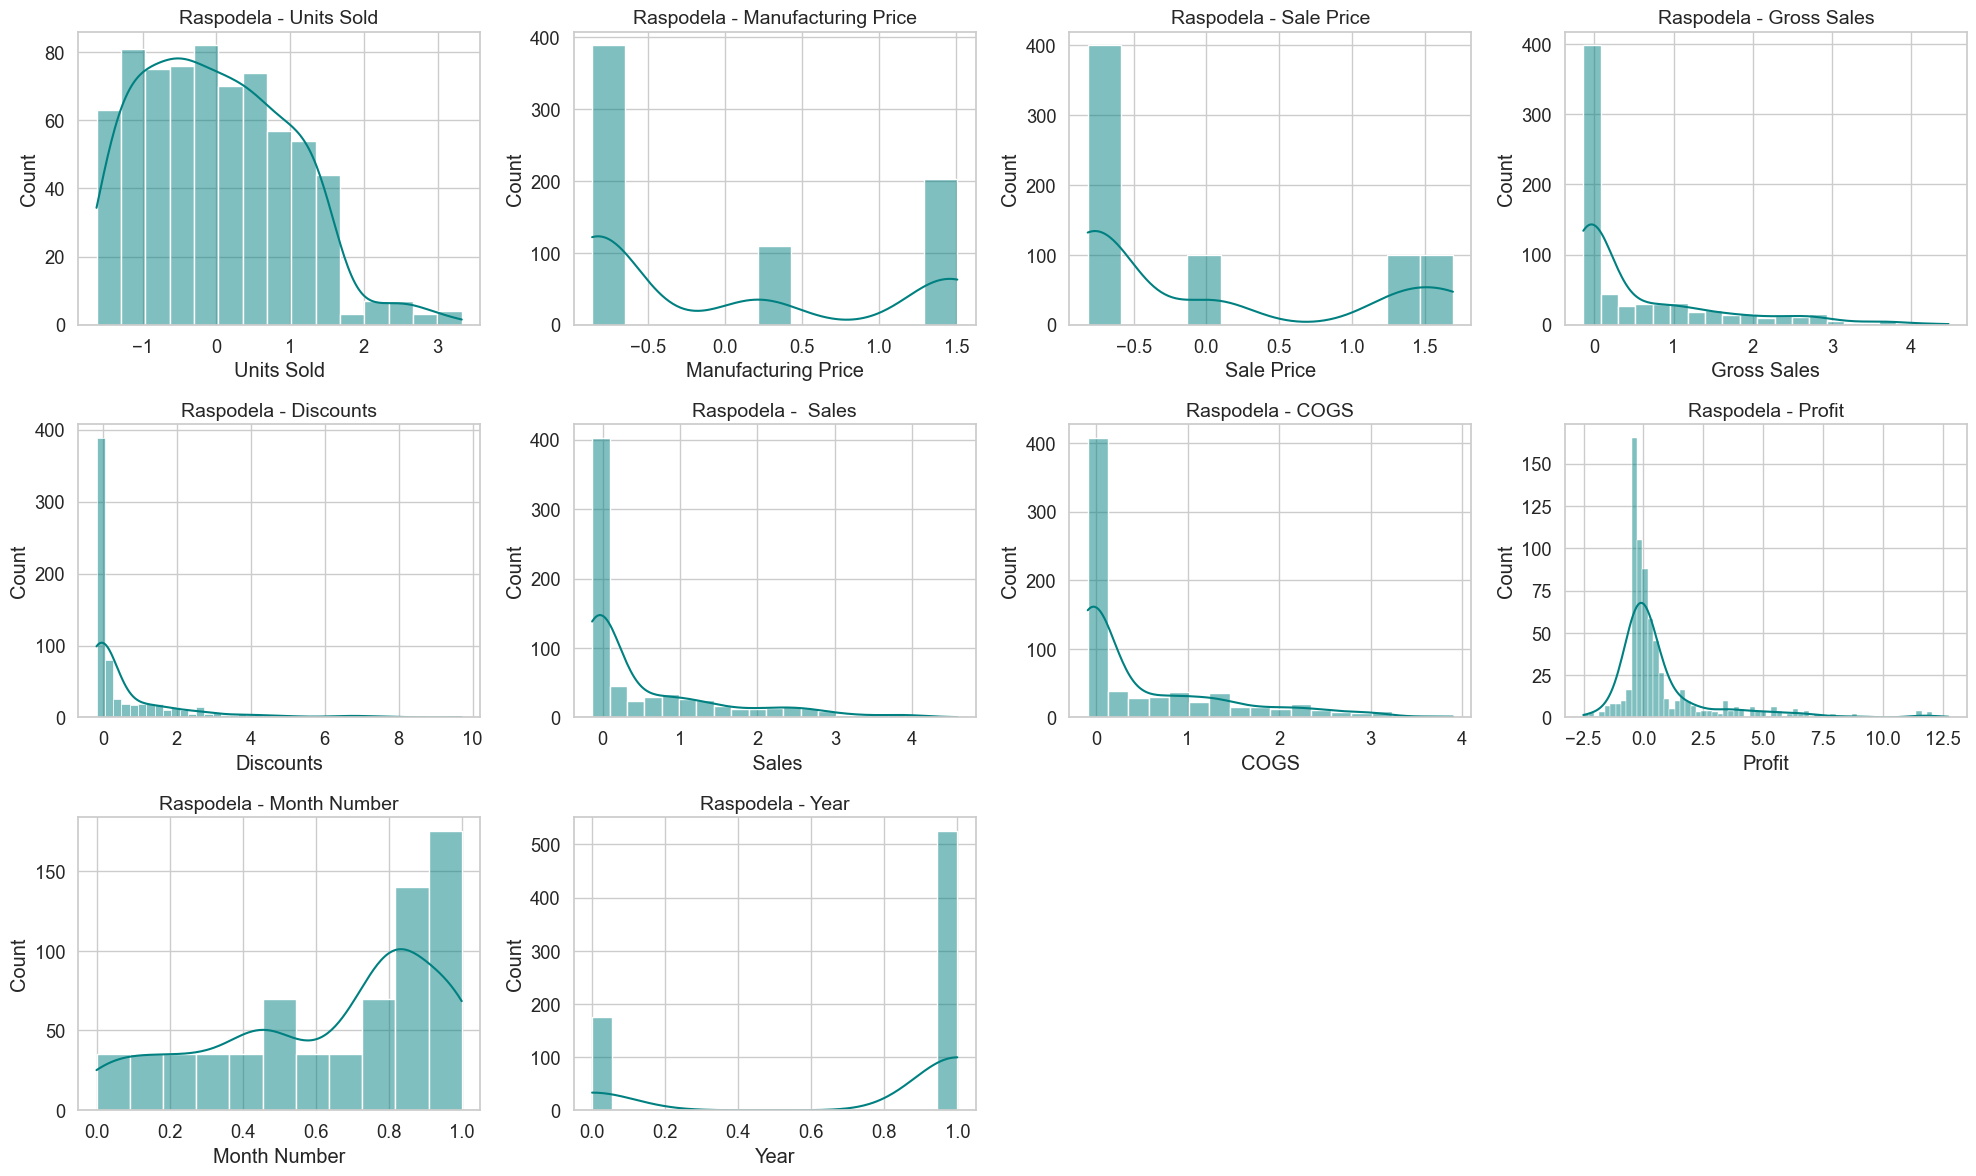

              precision    recall  f1-score   support

        High       0.82      0.51      0.63        53
         Low       0.67      0.35      0.46        34
      Medium       0.51      0.53      0.52        43
 No Discount       0.14      0.60      0.22        10

    accuracy                           0.49       140
   macro avg       0.53      0.50      0.46       140
weighted avg       0.64      0.49      0.53       140



In [21]:
def scale_data(data):
    data_scaled = data.copy()
    numerical_columns = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
                        ' Sales', 'COGS', 'Profit', 'Month Number', 'Year']

    scaling_transformer = ColumnTransformer(
        transformers=[
            ('zscore', StandardScaler(), ['Units Sold', 'Manufacturing Price', 'Sale Price']),
            ('robust', RobustScaler(), ['Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit']),
            ('minmax', MinMaxScaler(), ['Month Number', 'Year'])
        ],
        remainder='passthrough'
    )
    data_scaled[numerical_columns] = scaling_transformer.fit_transform(data_scaled[numerical_columns])
    return data_scaled

data_scaled = scale_data(data)
visualize_numerical_features(data_scaled)
apply_svm(data_scaled)

### Transformacije koje menjaju raspodelu podataka

In [22]:
def diagnostic_plots(original_data, transformed_data, original_title, transformed_title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(original_data, bins=30, kde=True, color='teal')
    plt.title(original_title)
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, bins=30, kde=True, color='salmon')
    plt.title(transformed_title)
    plt.show()


In [23]:
def transform_data(data):
    data_transformed = data.copy()

    data_transformed['Manufacturing Price'] = np.log1p(data_transformed['Manufacturing Price'])
    data_transformed[' Sales'] = np.log1p(data_transformed[' Sales'])

    boxcox_transformer = PowerTransformer(method='box-cox', standardize=True)
    data_transformed['COGS'] = boxcox_transformer.fit_transform(data[['COGS']])

    quantile_transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=0)
    data_transformed['Gross Sales'] = quantile_transformer.fit_transform(data[['Gross Sales']])
    data_transformed['Discounts'] = quantile_transformer.fit_transform(data[['Discounts']])

    yeojohnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    data_transformed['Profit'] = yeojohnson_transformer.fit_transform(data[['Profit']])

    return data_transformed


Numeričke kolone: ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit', 'Month Number', 'Year']


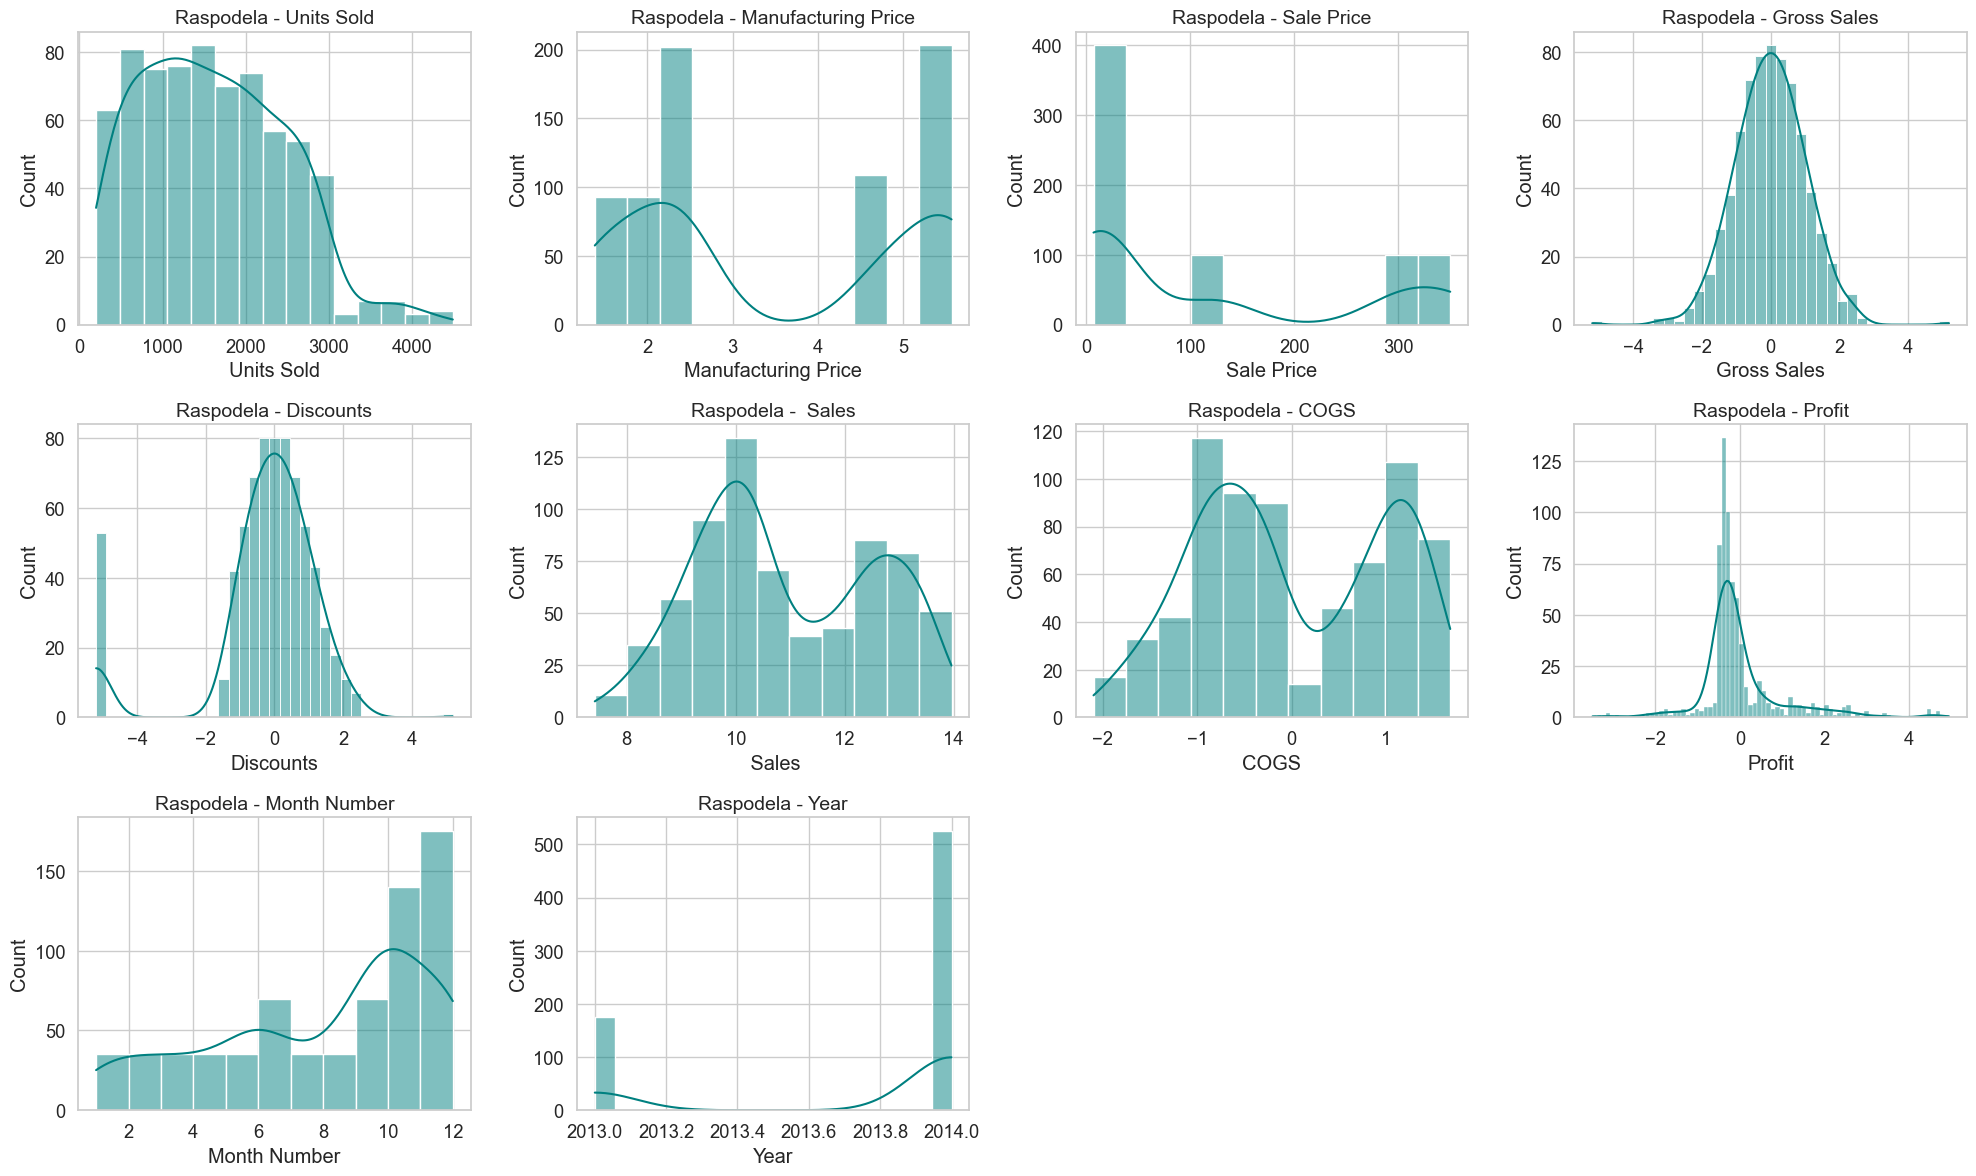

              precision    recall  f1-score   support

        High       0.29      0.23      0.26        53
         Low       0.20      0.56      0.29        34
      Medium       0.00      0.00      0.00        43
 No Discount       0.00      0.00      0.00        10

    accuracy                           0.22       140
   macro avg       0.12      0.20      0.14       140
weighted avg       0.16      0.22      0.17       140



In [24]:
data_transformed = transform_data(data)
visualize_numerical_features(data_transformed)
apply_svm(data_transformed)

In [25]:
data_transformed_scaled = scale_data(data_transformed)
apply_svm(data_transformed_scaled)

              precision    recall  f1-score   support

        High       0.68      0.49      0.57        53
         Low       0.85      0.65      0.73        34
      Medium       0.43      0.67      0.53        43
 No Discount       1.00      0.90      0.95        10

    accuracy                           0.61       140
   macro avg       0.74      0.68      0.69       140
weighted avg       0.67      0.61      0.62       140



### Diskretizacija

In [26]:
def plot_histogram_before_discretization(data, column, display_name, bins=30):
    """
    Prikazuje histogram distribucije za zadatu kolonu pre diskretizacije.

    Parametri:
    - data (pd.DataFrame): DataFrame koji sadrži podatke.
    - column (str): Naziv kolone za analizu.
    - display_name (str): Naziv koji će biti prikazan na grafiku.
    - bins (int): Broj binova za histogram.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=True)
    plt.title(f'Distribucija "{display_name}" pre Diskretizacije')
    plt.xlabel(display_name)
    plt.ylabel('Frekvencija')
    plt.show()

In [27]:
def discretize_and_plot_count_after(data_input, column, display_name, n_bins=5, strategy='uniform'):
    """
    Diskretizuje zadatu kolonu i prikazuje distribuciju nakon diskretizacije.

    Parametri:
    - data (pd.DataFrame): DataFrame koji sadrži podatke.
    - column (str): Naziv kolone za diskretizaciju.
    - display_name (str): Naziv koji će biti prikazan na grafiku.
    - n_bins (int): Broj binova za diskretizaciju.
    - strategy (str): Strategija diskretizacije ('uniform', 'quantile', 'kmeans').

    Povratna vrednost:
    - data (pd.DataFrame): DataFrame sa dodatnim kolonama za binned vrednosti i etikete.
    """
    # Definisanje opisa strategija na hrvatskom jeziku
    strategy_descriptions = {
        'uniform': 'Jednaka Širina',
        'quantile': 'Jednaka Frekvencija',
        'kmeans': 'K-Means'
    }
    data=data_input.copy()
    
    # Primena diskretizacije
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    data[f'{column} Binned'] = est.fit_transform(data[[column]]).astype(int).flatten()
    
    # Dodavanje etiketa binova za vizualizaciju
    bin_edges = est.bin_edges_[0]
    
    # Provera da li su svi bin_edges celobrojni
    if all(edge == int(edge) for edge in bin_edges):
        bin_labels = [f'Bin {i+1}: {int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(n_bins)]
    else:
        bin_labels = [f'Bin {i+1}: {round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(n_bins)]
    
    data[f'{display_name} Binned Labels'] = data[f'{column} Binned'].apply(lambda x: bin_labels[x])
    
    # Prikaz distribucije nakon diskretizacije
    plt.figure(figsize=(10, 6))
    sns.countplot(x=f'{display_name} Binned Labels', data=data, order=bin_labels)
    strategy_desc = strategy_descriptions.get(strategy, strategy)
    plt.title(f'Distribucija "{display_name}" nakon diskretizacije ({strategy_desc})')
    plt.xlabel('Binovi')
    plt.ylabel('Broj Instanci')
    plt.xticks(rotation=45)
    plt.show()
    
    return data


In [28]:
def discretize_data(data):
    data_discretized = data.copy()
    discretize_and_plot_count_after(data, 'Sale Price', 'Sale Price', n_bins=3, strategy='uniform')
    discretize_and_plot_count_after(data, 'Units Sold', 'Units Sold', n_bins=4, strategy='quantile')
    discretize_and_plot_count_after(data, 'Gross Sales', 'Gross Sales', n_bins=5, strategy='kmeans')

    tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_model.fit(data[['Profit']], data[' Sales'])
    data_discretized['Profit'] = tree_model.predict(data[['Profit']])

    return data_discretized


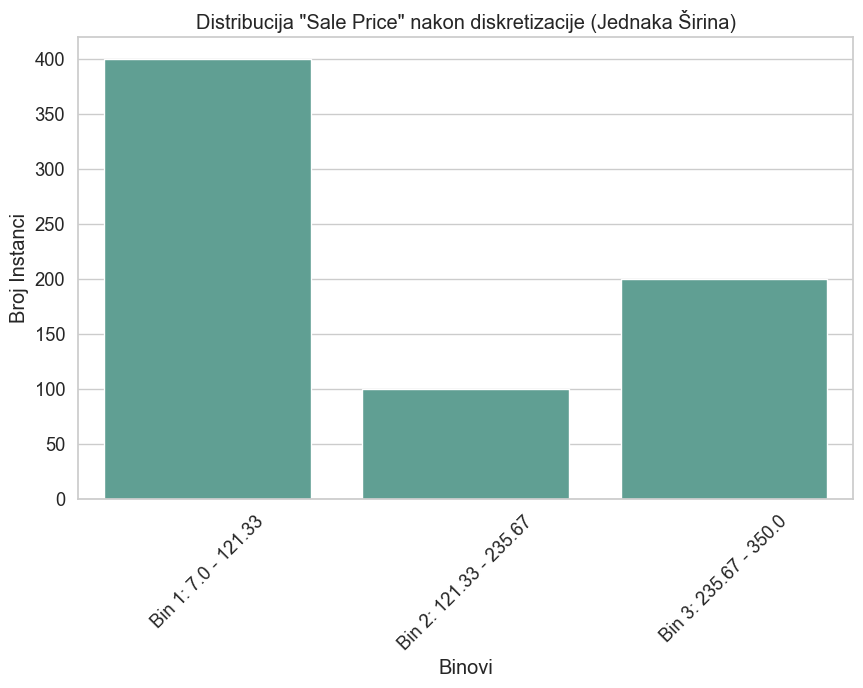

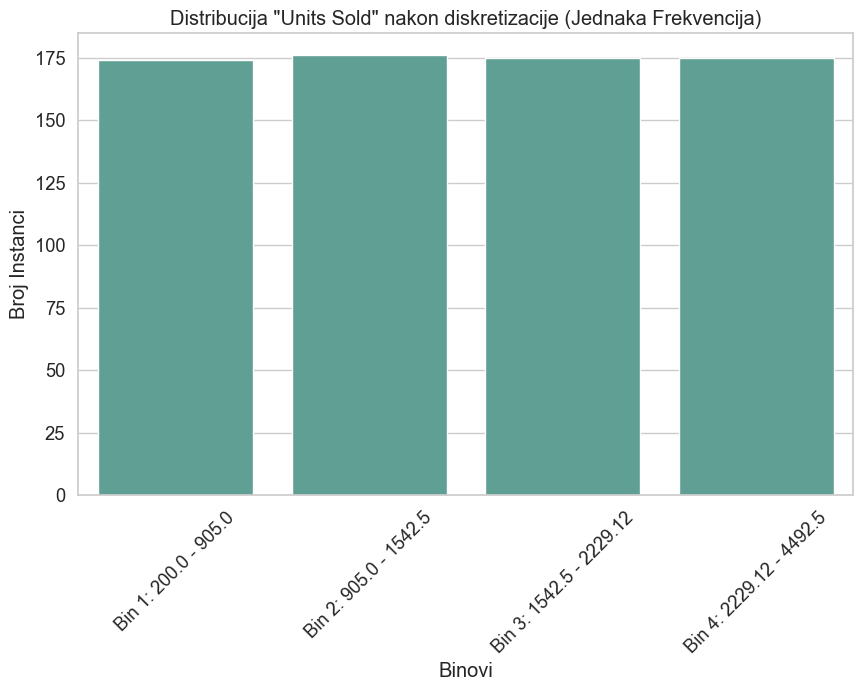

  File "c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


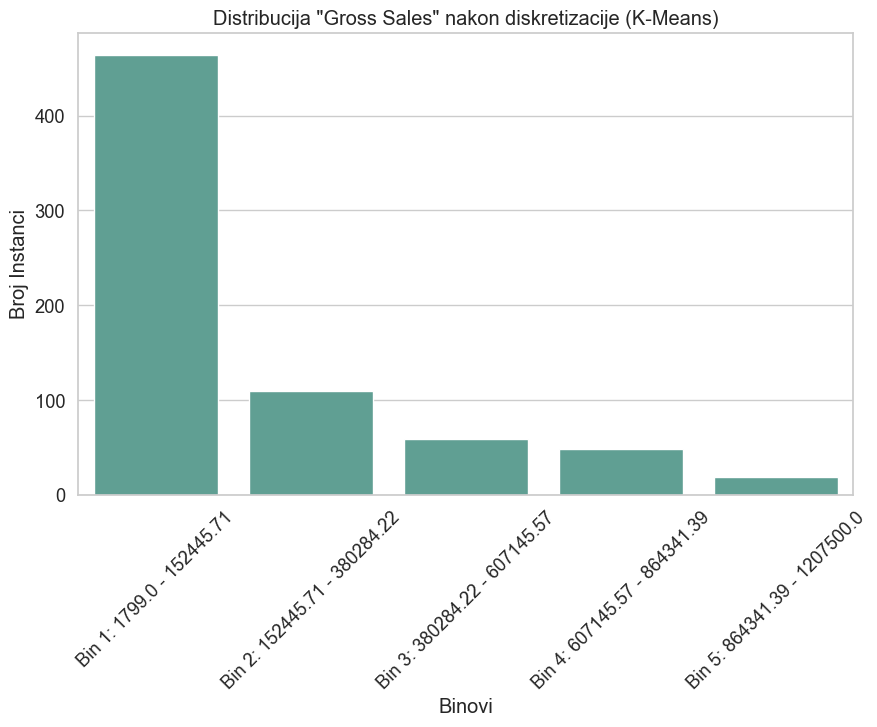

              precision    recall  f1-score   support

        High       0.65      0.32      0.43        53
         Low       0.53      0.26      0.35        34
      Medium       0.58      0.16      0.25        43
 No Discount       0.09      0.80      0.17        10

    accuracy                           0.29       140
   macro avg       0.47      0.39      0.30       140
weighted avg       0.56      0.29      0.34       140



In [29]:
data_discretized = discretize_data(data)
apply_svm(data_discretized)

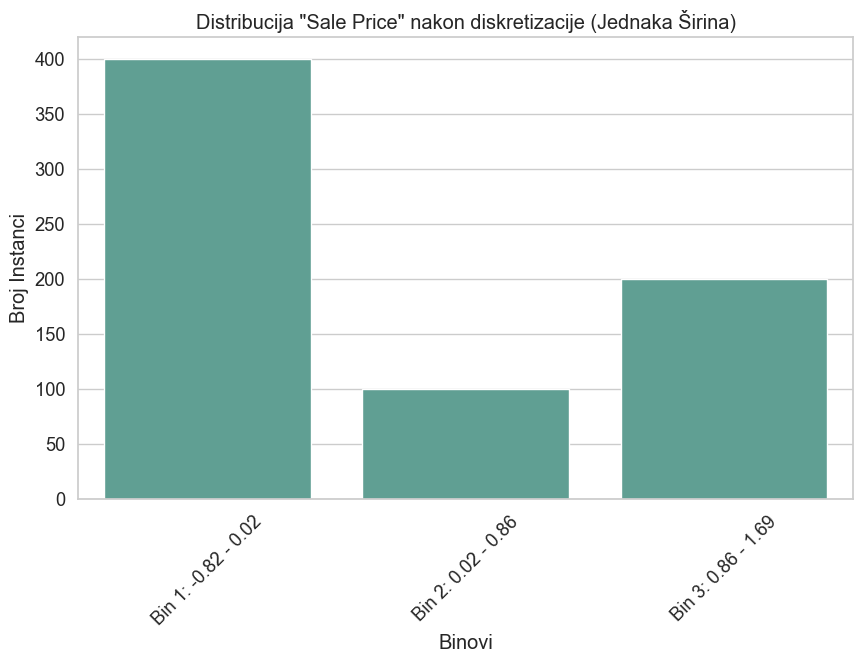

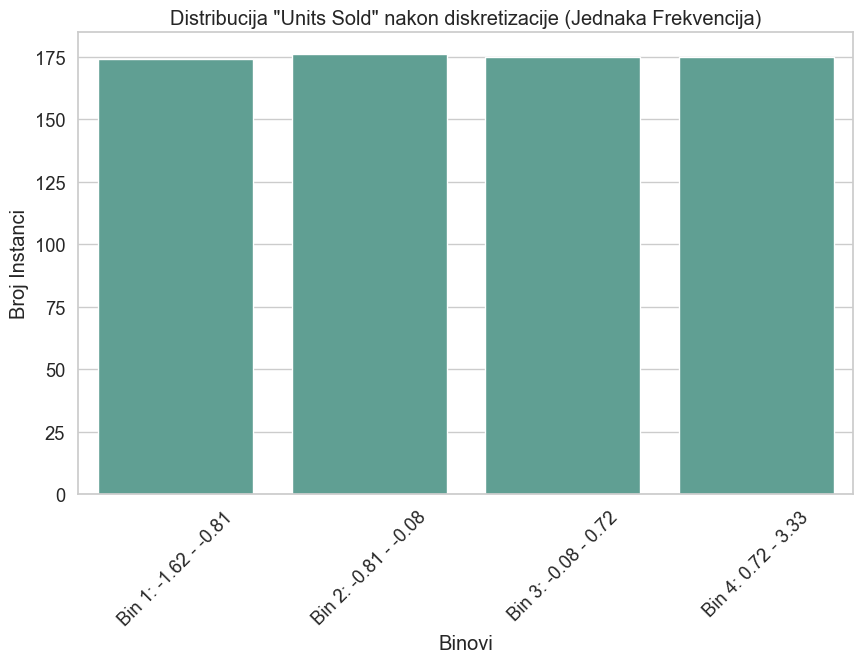

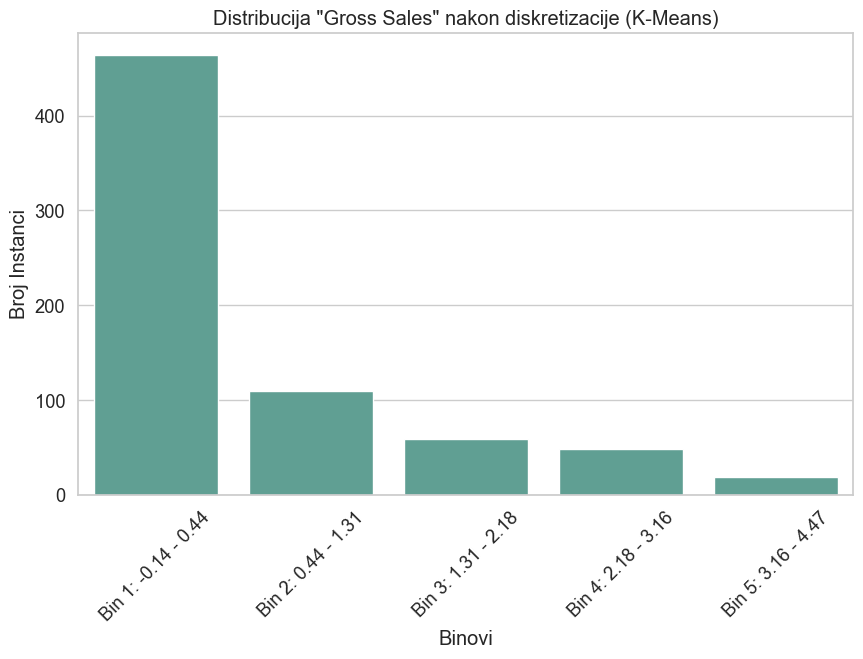

              precision    recall  f1-score   support

        High       0.74      0.47      0.57        53
         Low       0.63      0.35      0.45        34
      Medium       0.51      0.49      0.50        43
 No Discount       0.13      0.60      0.21        10

    accuracy                           0.46       140
   macro avg       0.50      0.48      0.44       140
weighted avg       0.60      0.46      0.50       140



In [30]:
data_scaled_discretized = discretize_data(data_scaled)
apply_svm(data_scaled_discretized)

### Rad sa outlier-ima

In [31]:
from matplotlib import gridspec
from matplotlib.patches import Rectangle

def plot_visualizations(df, columns):
    plots_per_column = 2
    groups_per_row = 2

    rows = math.ceil(len(columns) / groups_per_row)

    fig = plt.figure(figsize=(groups_per_row * 7, rows * 5))
    gs = gridspec.GridSpec(rows, groups_per_row, figure=fig, wspace=0.3, hspace=0.3)

    for idx, col in enumerate(columns):
        row = idx // groups_per_row
        col_pos = idx % groups_per_row

        inner_gs = gridspec.GridSpecFromSubplotSpec(
            plots_per_column, 1,
            subplot_spec=gs[row, col_pos],
            hspace=0.2
        )

        ax_box = fig.add_subplot(inner_gs[0])
        sns.boxplot(y=df[col], ax=ax_box, color='teal')
        ax_box.set_title('', fontsize=10) 
        ax_box.set_ylabel('')

        # Kreirajte Histogram
        ax_hist = fig.add_subplot(inner_gs[1])
        sns.histplot(df[col], kde=True, ax=ax_hist, color='teal')
        ax_hist.set_title('', fontsize=10) 
        ax_hist.set_xlabel('')

        ax_box.set_title(f'{col}', fontsize=12, fontweight='bold')

        pos = gs[row, col_pos].get_position(fig) 
        rect = Rectangle((pos.x0, pos.y0), pos.width, pos.height,
                         linewidth=1, edgecolor='black', facecolor='none')
        fig.patches.append(rect)

    plt.show()


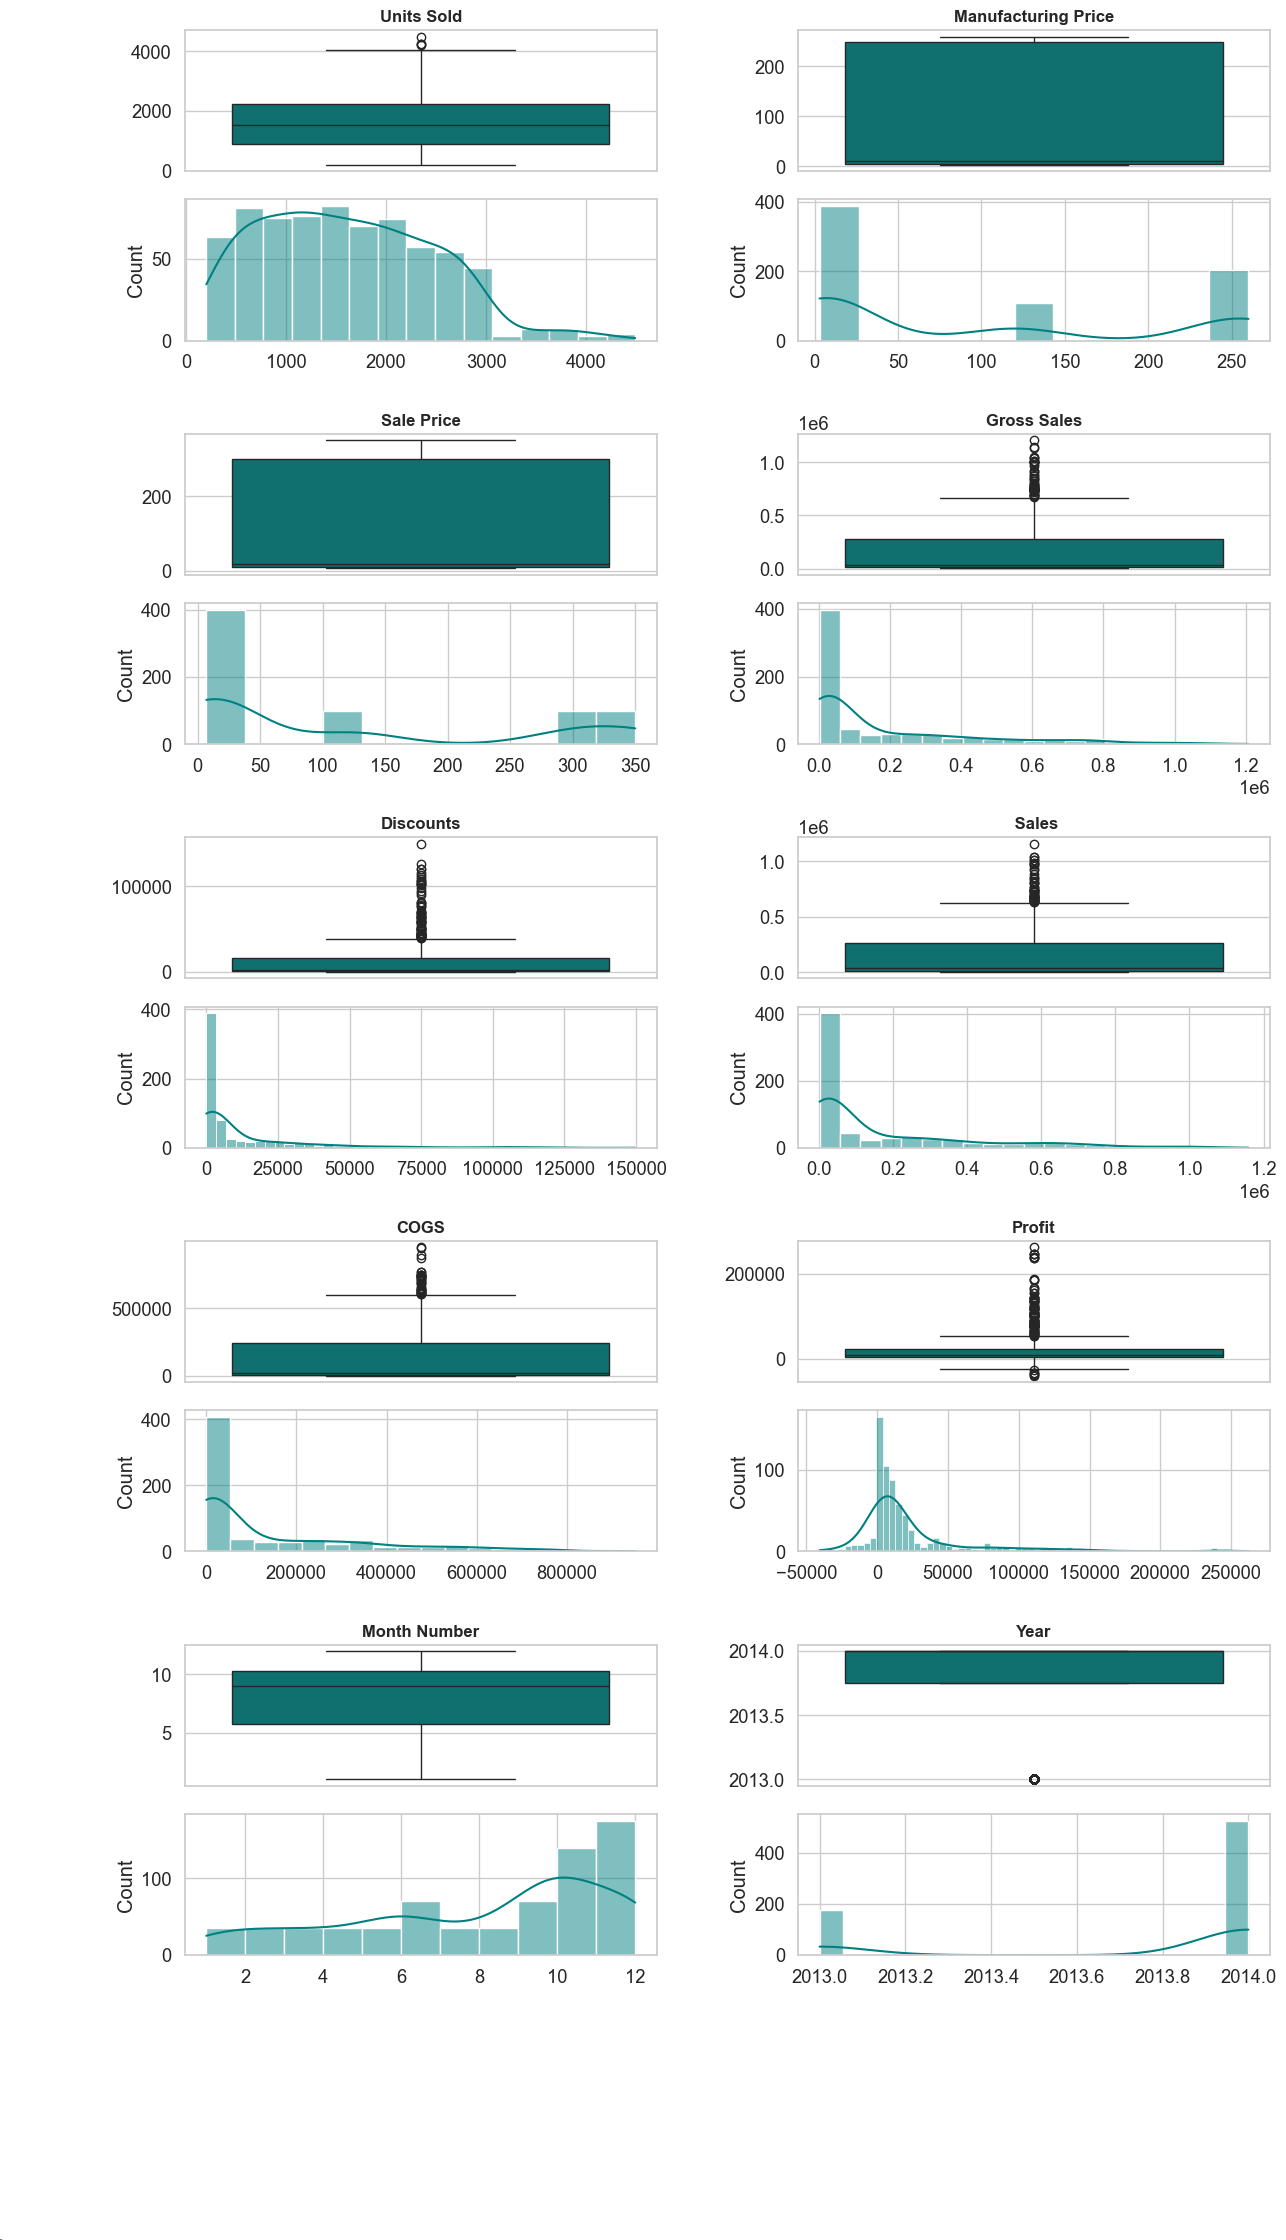

In [32]:
plot_visualizations(data, columns=numerical_columns)

In [33]:
def plot_outliers_comparison(df_before, df_after, columns, method_name):
    for col in columns:
        plt.figure(figsize=(20, 4))
        
        # Box Plot pre uklanjanja outliera
        plt.subplot(1, 4, 1)
        sns.boxplot(y=df_before[col], flierprops={'markerfacecolor': 'red', 'markersize': 6})
        plt.title(f'{method_name} - Pre - Box Plot of {col}')
        plt.ylabel(col)
        
        # Box Plot posle uklanjanja outliera
        plt.subplot(1, 4, 2)
        sns.boxplot(y=df_after[col], flierprops={'markerfacecolor': 'red', 'markersize': 6})
        plt.title(f'{method_name} - Posle - Box Plot of {col}')
        plt.ylabel(col)
        
        # Histogram pre uklanjanja outliera
        plt.subplot(1, 4, 3)
        sns.histplot(df_before[col], kde=True, color='skyblue', label='Normal Range')
        
        plt.title(f'{method_name} - Pre - Histogram of {col}')
        plt.xlabel(col)
        plt.legend()
        
        # Histogram posle uklanjanja outliera
        plt.subplot(1, 4, 4)
        sns.histplot(df_after[col], kde=True, color='skyblue', label='Normal Range')
        plt.title(f'{method_name} - Posle - Histogram of {col}')
        plt.xlabel(col)
        plt.legend()
        
        plt.tight_layout()
        plt.show()


#### Z-score

In [34]:
def detect_outliers_zscore_single(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    outlier_indices = df.index[abs(z_scores) > threshold].tolist()
    return outlier_indices

#### IQR

In [35]:
def detect_outliers_iqr_single(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (factor * IQR)
    upper_bound = Q3 + (factor * IQR)
    outlier_indices = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)].tolist()
    return outlier_indices

#### Percentile

In [36]:
def detect_outliers_percentile_single(df, column, lower_percentile=3, upper_percentile=97):
    lower_bound = df[column].quantile(lower_percentile / 100)
    upper_bound = df[column].quantile(upper_percentile / 100)
    outlier_indices = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)].tolist()
    return outlier_indices

#### DBSCAN

In [37]:
def detect_outliers_dbscan_single(df, column, eps=0.1, min_samples=10):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[[column]])

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X_scaled)

    labels = dbscan.labels_
    outlier_indices = df.index[labels == -1].tolist()
    return outlier_indices

#### Isolation Forest

In [38]:
def detect_outliers_isolation_forest_single(df, column, contamination=0.05):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[[column]])

    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(X_scaled)

    labels = iso_forest.predict(X_scaled)
    outlier_indices = df.index[labels == -1].tolist()
    return outlier_indices

In [39]:
def clean_data(data):
    data_cleaned = data.copy()

    zscore_outliers = detect_outliers_zscore_single(data_cleaned, 'Gross Sales')
    iqr_outliers = detect_outliers_iqr_single(data_cleaned, 'Discounts')
    percentile_outliers = detect_outliers_percentile_single(data_cleaned, ' Sales')
    dbscan_outliers = detect_outliers_dbscan_single(data_cleaned, 'COGS')
    iso_forest_outliers = detect_outliers_isolation_forest_single(data_cleaned, 'Profit')

    all_outliers = set(zscore_outliers + iqr_outliers + percentile_outliers + dbscan_outliers + iso_forest_outliers)
    data_cleaned = data_cleaned.drop(index=all_outliers)

    print(f"Broj outlier-a detektovanih Z-score metodom: {len(zscore_outliers)}")
    print(f"Broj outlier-a detektovanih IQR metodom: {len(iqr_outliers)}")
    print(f"Broj outlier-a detektovanih Percentile metodom: {len(percentile_outliers)}")
    print(f"Broj outlier-a detektovanih DBSCAN metodom: {len(dbscan_outliers)}")
    print(f"Broj outlier-a detektovanih Isolation Forest metodom: {len(iso_forest_outliers)}")
    print(f"Ukupan broj jedinstvenih outlier-a: {len(all_outliers)}")
    print(f"Broj preostalih redova nakon uklanjanja outlier-a: {data_cleaned.shape[0]}\n\n")

    return data_cleaned

data_cleaned = clean_data(data)
apply_svm(data_cleaned)


Broj outlier-a detektovanih Z-score metodom: 14
Broj outlier-a detektovanih IQR metodom: 75
Broj outlier-a detektovanih Percentile metodom: 41
Broj outlier-a detektovanih DBSCAN metodom: 11
Broj outlier-a detektovanih Isolation Forest metodom: 34
Ukupan broj jedinstvenih outlier-a: 120
Broj preostalih redova nakon uklanjanja outlier-a: 580


              precision    recall  f1-score   support

        High       0.31      0.90      0.46        31
         Low       0.33      0.09      0.14        34
      Medium       0.43      0.15      0.22        41
 No Discount       0.50      0.10      0.17        10

    accuracy                           0.33       116
   macro avg       0.39      0.31      0.25       116
weighted avg       0.37      0.33      0.26       116



In [40]:
def create_features(data):
    data_features = data.copy()
    avg_sales_per_month = data.groupby('Month Name')[' Sales'].mean()
    data_features['Avg Sales per Month'] = data['Month Name'].map(avg_sales_per_month)
    data_features['Manufacturing Cost'] = data['Manufacturing Price'] * data['Units Sold']
    data_features['Net Sales'] = data[' Sales'] - data['Discounts']
    data_features['Total Revenue'] = data['Units Sold'] * data['Sale Price']
    data_features['Day of Week'] = pd.to_datetime(data['Date']).dt.dayofweek
    data_features['Is Weekend'] = data_features['Day of Week'].isin([5, 6])
    data_features['Quarter'] = pd.to_datetime(data['Date']).dt.quarter

    return data_features


In [41]:
data_features = create_features(data)
apply_svm(data_features)

              precision    recall  f1-score   support

        High       0.50      0.15      0.23        53
         Low       0.26      0.21      0.23        34
      Medium       0.56      0.42      0.48        43
 No Discount       0.06      0.40      0.11        10

    accuracy                           0.26       140
   macro avg       0.35      0.29      0.26       140
weighted avg       0.43      0.26      0.30       140

